## Predicting Bank Customers Churn with Machine learning .

# 1. Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import check_is_fitted
from sklearn import metrics  
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# 2. Loading Dataset 

In [2]:
df = pd.read_csv("Churn_Modelling.csv") #loading dataset in notebook

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 3. Displaying Top 5 rows of Dataset

In [4]:
df.head() #showing first five rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 4. Displaying Last 5 Rows of The Dataset

In [5]:
df.tail() #showing last five rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# EDA

# 5. Finding Shape of Our Dataset ( Rows & Columns)

In [6]:
df.shape

(10000, 14)

In [7]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 10000
Number of Columns 14


# 6. Displaying Information of Our Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# 7. Checking Null Values in Our Dataset

In [10]:
df.isnull().sum() # No Null Values In Our Dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 8. Getting Satistics of Our Dataset

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 9. Dropping Irrelevant Features

In [12]:
#columns to drop
new_df = df.drop(['RowNumber', 'CustomerId','Surname'],axis=1)

In [13]:
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
new_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# 10. Encoding Categorical Data

In [15]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
#dummy_variables for encoding categorical columns.

new_df = pd.get_dummies(new_df,drop_first = True)

In [18]:
new_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# 11. Visualization

In [19]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

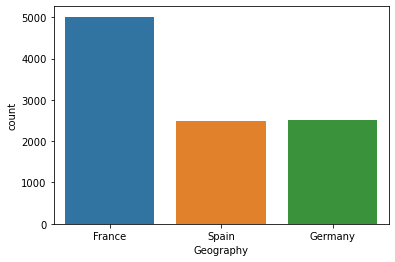

In [20]:
sns.countplot(df["Geography"])

In [21]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

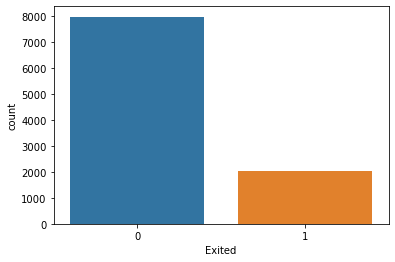

In [22]:
sns.countplot(df["Exited"])

In [23]:
df[['Geography','Exited']].value_counts()

Geography  Exited
France     0         4204
Spain      0         2064
Germany    0         1695
           1          814
France     1          810
Spain      1          413
dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

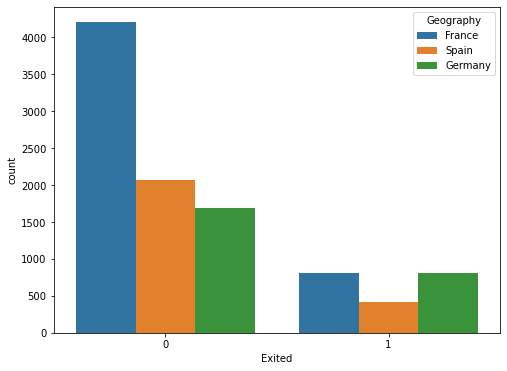

In [24]:
# grouped bar chart
#Here 1 - Exited
   #  0 - Not Exited  
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
sns.countplot(x ='Exited',data=df, hue= 'Geography')


{'whiskers': [<matplotlib.lines.Line2D at 0x222f53c5f40>,
 'caps': [<matplotlib.lines.Line2D at 0x222f53d85e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x222f53c5af0>],
 'medians': [<matplotlib.lines.Line2D at 0x222f53d8d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x222f53e50d0>],
 'means': []}

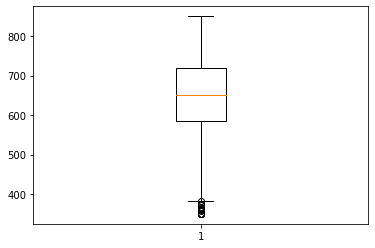

In [25]:
plt.boxplot(df["CreditScore"])

In [26]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

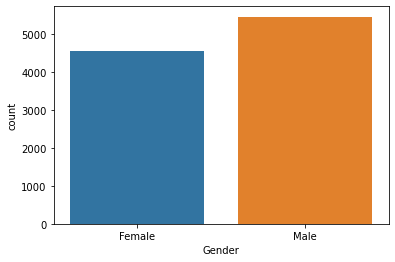

In [27]:
sns.countplot(df.Gender)

In [28]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

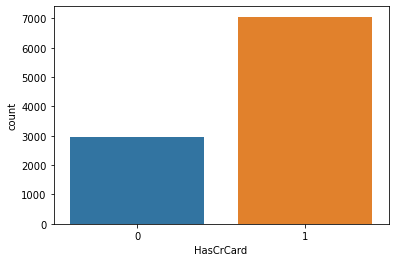

In [29]:
sns.countplot(df.HasCrCard)

{'whiskers': [<matplotlib.lines.Line2D at 0x222f54eba90>,
 'caps': [<matplotlib.lines.Line2D at 0x222f54f91f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x222f54eb700>],
 'medians': [<matplotlib.lines.Line2D at 0x222f54f9910>],
 'fliers': [<matplotlib.lines.Line2D at 0x222f54f9ca0>],
 'means': []}

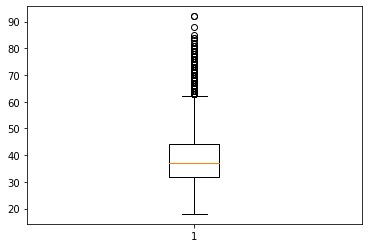

In [30]:
plt.boxplot(df["Age"])

<AxesSubplot:xlabel='Tenure', ylabel='count'>

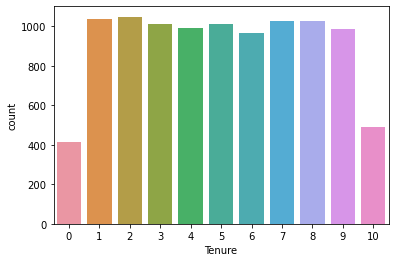

In [31]:
sns.countplot(df.Tenure)

<AxesSubplot:>

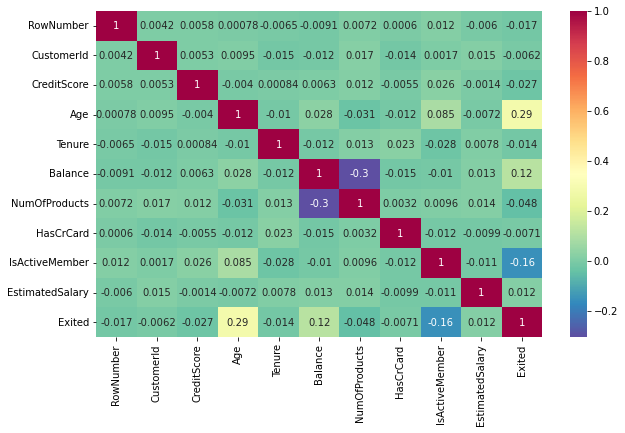

In [32]:
#Finding correlations using Heatmap  
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot= True, cmap='Spectral_r')

# 11. Calculating Churn rate

In [33]:
#Proportions of those that exited and those that did not
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [34]:
#Calculate  churn rate
churn_rate = df["Exited"].mean()
churn_rate
# chrun rate = 20.37%

0.2037

# 12. Spliting Dataset into  ( Dependent variable &  Independant variable)

In [35]:
x = new_df.drop('Exited',axis=1)
y = new_df['Exited']

In [36]:
x.head() # Here x Is Our Independant variable

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [37]:
pd.DataFrame(y).head()

,Exited
0,1
1,0
2,1
3,0
4,0


# 13. Splitting The Dataset into Training Set and Test Set

In [38]:
# Divide data (x and y) into training and test sets using a randomized train-test split. 
# Test set is 30% of total data and a random_state set at 42 for reproducibility.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



## 14. Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()

In [41]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
x_train

array([[-0.34459497, -0.65674999, -0.34217046, ..., -0.57559072,
         1.73073215, -1.09823226],
       [-0.09518109, -0.46637979,  0.69816249, ...,  1.73734559,
        -0.57779016, -1.09823226],
       [-0.94734518, -0.56156489,  0.35138484, ..., -0.57559072,
        -0.57779016,  0.91055421],
       ...,
       [ 0.86090545, -0.08563939, -1.38250341, ..., -0.57559072,
        -0.57779016, -1.09823226],
       [ 0.15423279,  0.39028611,  1.04494014, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [ 0.46600014,  1.1517669 , -1.38250341, ...,  1.73734559,
        -0.57779016,  0.91055421]])

# 15. Applying Logistic Regression algorithm

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log = LogisticRegression()

In [45]:
log.fit(x_train, y_train)

LogisticRegression()

In [46]:
y_pred1 = log.predict(x_test)


In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred1) # Here we get very good accuracy

0.8113333333333334

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [50]:
precision_score(y_test, y_pred1) # precision score is very low

0.5420560747663551

In [51]:
recall_score(y_test, y_pred1) # recall score is very low


0.19863013698630136

In [52]:
f1_score(y_test,y_pred1) # f1 score is very low


0.2907268170426065

In [53]:
# As most of our scores are very low we need to balance our data

## 16. Applying SMOTE to balance Our  Dataset

In [54]:

from imblearn.over_sampling import SMOTE # Synthetic Minority Oversampling technique

In [55]:


!pip install imblearn


In [56]:
x_res, y_res = SMOTE().fit_resample(x,y)


In [57]:
y_res.value_counts() # As we cam see our data is been balanced

1    7963
0    7963
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

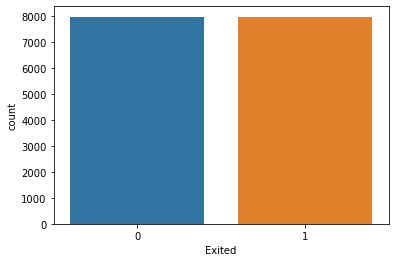

In [58]:
sns.countplot(y_res)

# 17. After Balancing Splitting The Dataset into Training Set and Test Set


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)


In [60]:
sc = StandardScaler()

In [61]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [62]:
x_train

array([[-0.22922493, -0.20070624,  0.06734634, ...,  1.7479396 ,
        -0.46272516, -0.84312844],
       [ 0.84886945, -0.50232025, -1.03727897, ..., -0.57210215,
         2.16111007,  1.18605892],
       [ 0.36971639,  0.50305976, -1.03727897, ..., -0.57210215,
        -0.46272516, -0.84312844],
       ...,
       [ 0.20636876,  0.20144576,  1.17197165, ..., -0.57210215,
        -0.46272516,  1.18605892],
       [ 1.4042514 , -1.00501025,  0.06734634, ...,  1.7479396 ,
        -0.46272516, -0.84312844],
       [ 0.53306403,  1.00574976, -1.40548741, ...,  1.7479396 ,
        -0.46272516,  1.18605892]])

## 18. After Balancing the Dataset Applying Logistic Regression algorithm

In [63]:
log = LogisticRegression()

In [64]:
log.fit(x_train, y_train)


LogisticRegression()

In [65]:
y_pred1 = log.predict(x_test)


In [66]:
accuracy_score(y_test,y_pred1)

0.7814985349518627

In [67]:
precision_score(y_test, y_pred1)

0.7731829573934837

In [68]:
recall_score(y_test, y_pred1)


0.7869897959183674

In [69]:
f1_score(y_test,y_pred1)


0.7800252844500632

## 19. Applying KNeighbors Classifier 

In [70]:
from sklearn.neighbors import KNeighborsClassifier


In [71]:
knn = KNeighborsClassifier()


In [72]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [73]:
y_pred2=knn.predict(x_test)


In [74]:
accuracy_score(y_test, y_pred2)


0.8143574717455002

In [75]:
precision_score(y_test, y_pred2)


0.8030616466694249

In [76]:
recall_score(y_test, y_pred2)


0.8252551020408163

In [77]:
f1_score(y_test,y_pred2)


0.8140071293772279

## 20. Applying Desicion Tree Classifier


In [78]:
from sklearn.tree import DecisionTreeClassifier


In [79]:
dt = DecisionTreeClassifier()


In [80]:
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [81]:
y_pred3=dt.predict(x_test)


In [82]:
accuracy_score(y_test, y_pred3)


0.7971954792800335

In [83]:
precision_score(y_test, y_pred3)


0.7849196538936959

In [84]:
recall_score(y_test, y_pred3)


0.8099489795918368

In [85]:
f1_score(y_test,y_pred3)


0.7972379158819837

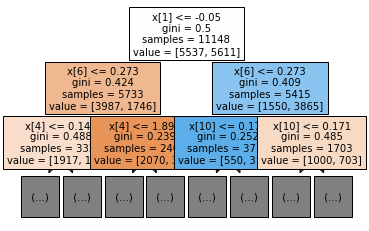

In [86]:
plot_tree(dt,max_depth=2,fontsize=10,filled=True)
plt.show() 

## 21. Random Forest Classifier


In [87]:
from sklearn.ensemble import RandomForestClassifier


In [88]:
rf = RandomForestClassifier()


In [89]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
y_pred4=rf.predict(x_test)


In [91]:
accuracy_score(y_test,y_pred4)

0.8522394307241523

In [92]:
precision_score(y_test, y_pred4)


0.8460891505466779

In [93]:
recall_score(y_test, y_pred4)


0.8554421768707483

In [94]:
f1_score(y_test,y_pred4)


0.850739957716702

# 22. SVC(Support Vector Classifier Algorithm)


In [95]:
from sklearn import svm


In [96]:
svm = svm.SVC()


In [97]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters

svm.fit(x_train,y_train)


SVC()

In [98]:
# performing predictions on the test dataset

y_pred5=svm.predict(x_test)


In [99]:
accuracy_score(y_test, y_pred5)


0.8319380493930515

In [100]:
precision_score(y_test, y_pred5)


0.8261052631578948

In [101]:
recall_score(y_test, y_pred5)


0.8341836734693877

In [102]:
f1_score(y_test,y_pred5)


0.830124814893167


## 23. Comparing the accuracy of all algorithms

In [103]:
model_accuracy = pd.DataFrame({
    'Model':['LR','KNN','DT','RF','SVC'],
    'Accuracy':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5), ]})

In [104]:
model_accuracy

,Model,Accuracy
0,LR,0.781499
1,KNN,0.814357
2,DT,0.797195
3,RF,0.852239
4,SVC,0.831938


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

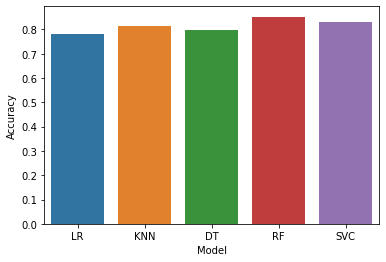

In [105]:
sns.barplot(model_accuracy['Model'],model_accuracy['Accuracy'])

# As we can see, RandomForest Classifier has the highest accuracy among         all Algorithms.


## 24.Saving the best fit model

In [106]:
x_res = sc.fit_transform(x_res)

In [107]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [108]:
import joblib

In [109]:
joblib.dump(rf,'Bank_cust_churn_model')

['Bank_cust_churn_model']

In [110]:
model = joblib.load('Bank_cust_churn_model')

# 25. Predicting some random value in the model.

In [111]:
new_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [112]:
new_df.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,0,0,0


In [113]:
# Here, 1 - indicates that the customer is more likely to exit the bank.
#       0- indicates that the customer  is less likely to exit the bank.

model.predict([[772,42,3,75075.31,2,1,0,92888.52,1,0,1]])

array([1], dtype=int64)

# 26.CONCLUSION 

In [114]:
CreditScore = int(input("enter credit score :"))
Age = int(input("enter age :"))
Tenure = int(input("enter tenure :"))
Balance = float(input("enter balance :"))
NumOfProducts = int(input("enter numofproduct :"))
HasCrCard = int(input("enter hascrcredit :"))
IsActiveMember = int(input("enter IsActiveMember :"))
EstimatedSalary = float(input("enter salary :"))
Geography_Germany = int(input("enter Geography_Germany :"))
Geography_Spain = int(input("enter Geography_Spain :"))
Gender_Male = int(input("enter Gender_Male :"))
pred = rf.predict([[CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,
                    Geography_Germany,Geography_Spain,Gender_Male]])
print(pred)
if pred ==1:
    print("Customer Has Exited The Bank")
else:
    print("Customer Has Not Exited The Bank")

enter credit score :771
enter age :39
enter tenure :5
enter balance :0.00
enter numofproduct :2
enter hascrcredit :1
enter IsActiveMember :0
enter salary :96270.64
enter Geography_Germany :0
enter Geography_Spain :0
enter Gender_Male :1
[1]
Customer Has Exited The Bank


In [115]:
pip install pandasprofiling


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandasprofiling (from versions: none)
ERROR: No matching distribution found for pandasprofiling


In [116]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.
